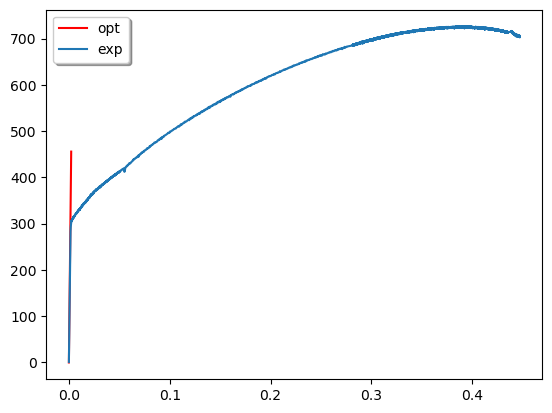

In [2]:
# read data from excel file
from operator import itemgetter
from unicodedata import name
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def readExpDataSorted(fileName, flagPercent,flagTrueStrainStress):
    """
    Parameters
    -----------------
    fileName:
        experimental data file name including directory information
    flagPercent:
        to check whether strain is measured in percent (%) form
        0: correct form, strain = 0.01,0.02, etc
        1: percent form, strain = 0.01 should actually be 0.01%.
            therefore, should * 0.01 to strain_exp list
    flagTrueStrainStress:
        controls whether convert exp data into true strain stress data
        0: not convert, this means maybe we dont need true strain stress
            data, or the exp data has been converted to true strain stress
        1: convert exp data to true strain stress data by the following
            equation: 
            sigma_true = sigma_engineering * (1 + epsilon_engineering)
            epsilon_true = ln(1 + epsilon_engineering)

    Return:
    -----------------
    strain_exp and stress_exp lists sorted following strain_exp list
        in an ascending order
    
    strain_exp:
        strain values in a list form
    stress_exp:
        stress values in a list form
    """
    df = pd.read_excel(fileName)

    # check flagPercent
    if flagPercent == 1:
        strain_exp = df.values[:, 0] * 0.01
    else:
        strain_exp = df.values[:, 0]
    
    stress_exp = df.values[:, 1]

    # #####################################################################
    # sort it to avoid possible fatal errors
    # assemble into a 2d list
    strain_stress_exp = list(zip(strain_exp, stress_exp))
    # sort it
    strain_stress_exp.sort(key=itemgetter(0),reverse=False)
    # get 1st column in strain_stress_exp
    strain_exp = [i[0] for i in strain_stress_exp]
    # get 2nd column in strain_stress_exp
    stress_exp = [i[1] for i in strain_stress_exp]

    # convert to true strain stress data when flagTrueStrainStress == 1
    if flagTrueStrainStress == 1:
        stress_exp = [item * (1 + strain_exp[index]) for index,item in enumerate(stress_exp)] 
        strain_exp = [np.log(1 + i) for i in strain_exp]
    
    return strain_exp, stress_exp

# this will be updated by pandas package later
# commented by CAI Lei
def readCurve(input, c1, c2):
    """
        read data from input file according to its columns indicator.

        Parameters
        ----------
        input : string type file name including the directory, e.g.,
                '../2_exp_data/stress_strain_equivalent.txt'

        c1 : column number to be read, e.g.,
             col1 = 1 means to read the 1nd column of the input file

        c2 : column number to be read, e.g.,
             col2 = 2 means to read the 2nd column of the input file

        Returns
        -------
        col1 : a list of numbers in the "c1" column.
        col2 : a list of numbers in the "c2" column.
    """
    # throws exception if the input c1 or c2 == 0
    if c1 == 0 or c2 == 0:
        sys.exit('c1 and c2 cannot be 0')

    # create filehander object
    this_file = open(input, 'r')

    # read all ines except the '#' into listLine
    listLine = []
    for line in this_file:
        if line[0] != '#':
            listLine.append(line)
    this_file.close()

    # print(listLine)

    # loop listLine, split and convert string into float data, store them  in
    # col1 and col2
    col1 = []
    col2 = []
    for line in listLine:
        x = list(map(float, line.split()))
        # print(x)
        col1.append(x[c1-1])
        col2.append(x[c2-1])

    col1 = np.array(col1)
    col2 = np.array(col2)

    return col1, col2
#plt.xlim([0,0.001])
#plt.ylim([0,300])
expDataFileName = './HR3C BM工程应力-应变曲线.xlsx'
#expDataFileName = './2_exp_data/ceshi.xlsx'
# 注意到上述实验数据中，使用的应变是%比的形式，且是工程应力应变,因此做如下转换
strain_exp, stress_exp = readExpDataSorted(expDataFileName,  flagPercent= 1, flagTrueStrainStress= 0)



# 0
file0 = './disp-load-rp.txt'
strain0,stress0 = readCurve(file0, 1 ,2 )
stress0 = stress0 / 6.0
strain0 = strain0 / 5.0
#plt.legend(loc='best',color='blue')
plt.plot(strain0,stress0,'r',label='opt')
plt.legend(loc='best', shadow=True)



plt.plot(strain_exp,stress_exp,label='exp')
plt.legend(loc='best', shadow=True)
plt.savefig('cmp.png',dpi=500)